In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split

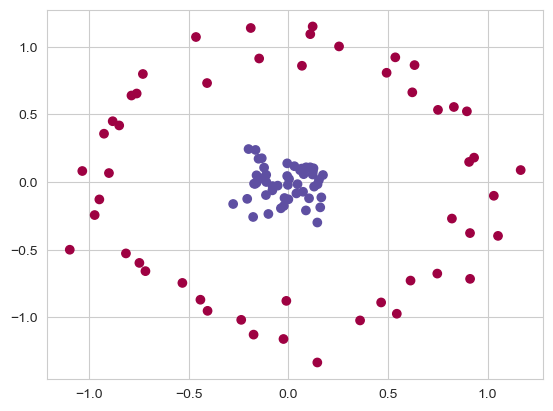

In [82]:
X, y = make_circles(100, factor=.1, noise=.1, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap='Spectral')

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60, 2) (40, 2) (60,) (40,)


In [84]:
# use rbf as the data is circular
# clf_svc = SVC(kernel='rbf', C=10, gamma='auto')
clf_svc = SVC(kernel='rbf', C=15, gamma=0.2)


#train using the training dataset
clf_svc.fit(X_train, y_train)




SVC(C=15, gamma=0.2)

In [85]:
# predict values and calculate accuracy and confusion matrix
y_pred = clf_svc.predict(X_test)
print("SVM RBF metrics")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

SVM RBF metrics
Accuracy:  1.0

Confusion Matrix: 
 [[21  0]
 [ 0 19]]


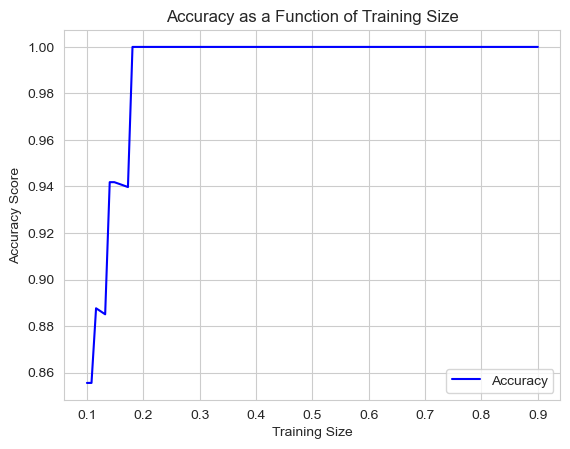

In [86]:
# testing performance by using accuracy for different training sizes
training_size = np.linspace(0.1,0.9, 100) # split sizing into intervals of 100
acc_score = np.empty(shape=training_size.shape)
# prec_score = np.empty(shape=training_size.shape)

for idx, val in enumerate(training_size):
    # split training and test data
    x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=val, random_state=0)
    
    # train data
    clf_svc.fit(x_train, y_train)
    
    # predict
    y_pred = clf_svc.predict(x_test)
    
    # append scores
    acc_score[idx] = metrics.accuracy_score(y_test, y_pred)
    # prec_score[idx] = metrics.precision_score(y_test, y_pred)


sns.set_style('whitegrid')
sns.lineplot(x=training_size, y=acc_score, color='blue', label="Accuracy")
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Accuracy as a Function of Training Size')
plt.show()